In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['figure.dpi']=100

In [3]:
df = pd.read_csv('../Data/credit_risk_dataset.csv')
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32572 entries, 0 to 32571
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32572 non-null  int64  
 1   person_income               32572 non-null  int64  
 2   person_home_ownership       32572 non-null  object 
 3   person_emp_length           32572 non-null  int64  
 4   loan_intent                 32572 non-null  object 
 5   loan_grade                  32572 non-null  object 
 6   loan_amnt                   32572 non-null  int64  
 7   loan_int_rate               32572 non-null  float64
 8   loan_status                 32572 non-null  int64  
 9   loan_percent_income         32572 non-null  float64
 10  cb_person_default_on_file   32572 non-null  object 
 11  cb_person_cred_hist_length  32572 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 3.0+ MB
None
       person_age  person_

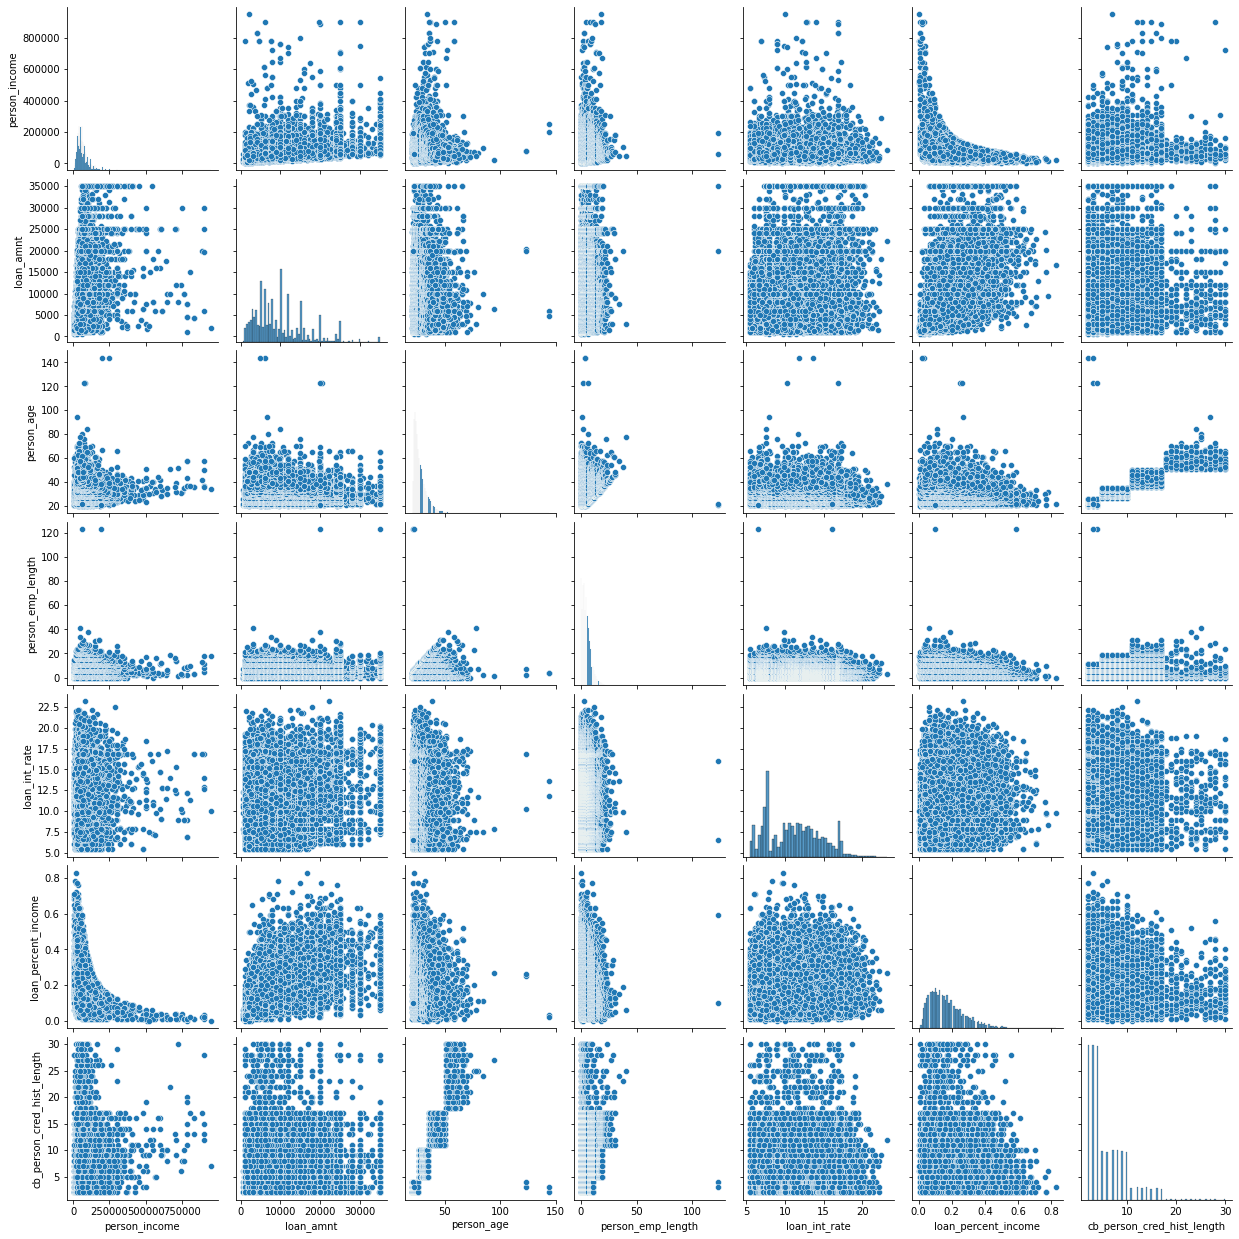

In [4]:
sns.pairplot(df[['person_income','loan_amnt','person_age','person_emp_length','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']])

<AxesSubplot:>

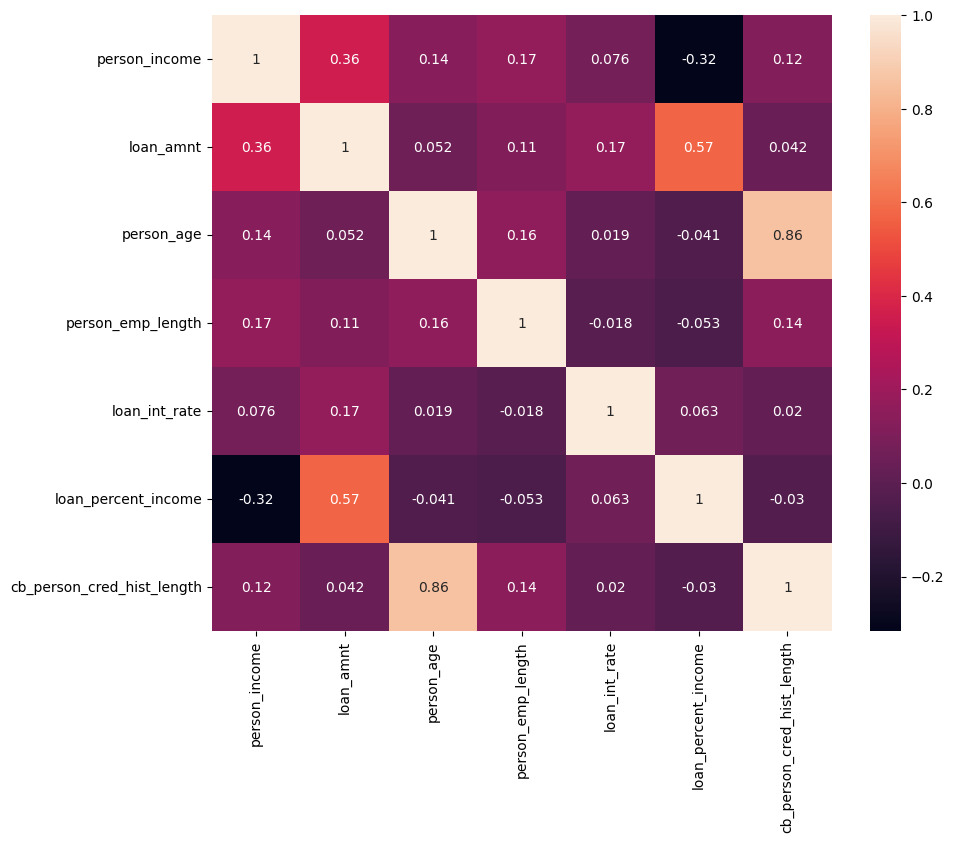

In [5]:
sns.heatmap(df[['person_income','loan_amnt','person_age','person_emp_length','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']].corr(),annot=True)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df[['person_income','loan_amnt','person_emp_length','loan_int_rate','loan_percent_income']],df.loan_status, test_size=0.1)
print(x_test)

       person_income  loan_amnt  person_emp_length  loan_int_rate  \
18968          64000      15000                  5          10.25   
12554          35000       4800                  3           9.99   
2021           23040       2000                  0          11.11   
11126          60000      10000                  3           6.03   
22544          70000       6000                  6          11.49   
...              ...        ...                ...            ...   
19139         126000       6000                  5          10.65   
22349         120000      25000                  6          10.74   
23304          39000      10000                  6          14.96   
24585          65004      20000                  7          10.36   
4230           75000       1200                  1           6.54   

       loan_percent_income  
18968                 0.23  
12554                 0.14  
2021                  0.09  
11126                 0.17  
22544                 0.09

In [7]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x_train,y_train)

In [8]:
intercept = model.intercept_
coefs = model.coef_
score = model.score(x_train,y_train)
print(score)
print(coefs)
prob_matrix = model.predict_proba(x_train)

0.8035409701848946
[[-4.03171671e-05  1.05460261e-04 -9.42560934e-08  2.11971150e-07
   3.03980259e-09]]


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
y_train_pred = model.predict(x_train)
m=classification_report(y_train,y_train_pred)
cm = confusion_matrix(y_train,y_train_pred)
print(m)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     22908
           1       0.73      0.16      0.26      6406

    accuracy                           0.80     29314
   macro avg       0.77      0.57      0.58     29314
weighted avg       0.79      0.80      0.75     29314



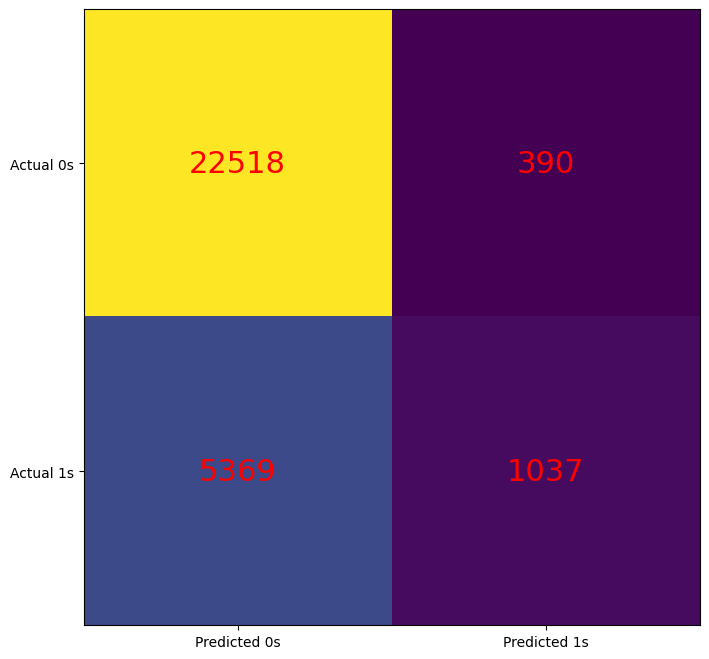

In [10]:
fig, ax = plt.subplots()
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha='center', va='center', color='r', fontsize=22)
plt.show()

In [11]:
y_pred = model.predict(x_test) # Making prediction
pred_score = model.score(x_test,y_test)
pred_prod_matrix= model.predict_proba(x_test)
print(pred_prod_matrix)

[[0.73074252 0.26925748]
 [0.71195331 0.28804669]
 [0.67216307 0.32783693]
 ...
 [0.62662484 0.37337516]
 [0.62517454 0.37482546]
 [0.94770953 0.05229047]]


In [12]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def prediction_function( inter, b1, person_income, b2,loan_amnt,b3,person_emp_length,b4,loan_int_rate,b5,loan_percent_income):
    z= inter + b1* person_income + b2*loan_amnt + b3*person_emp_length + b4*loan_int_rate +b5*loan_percent_income
    return sigmoid(z)

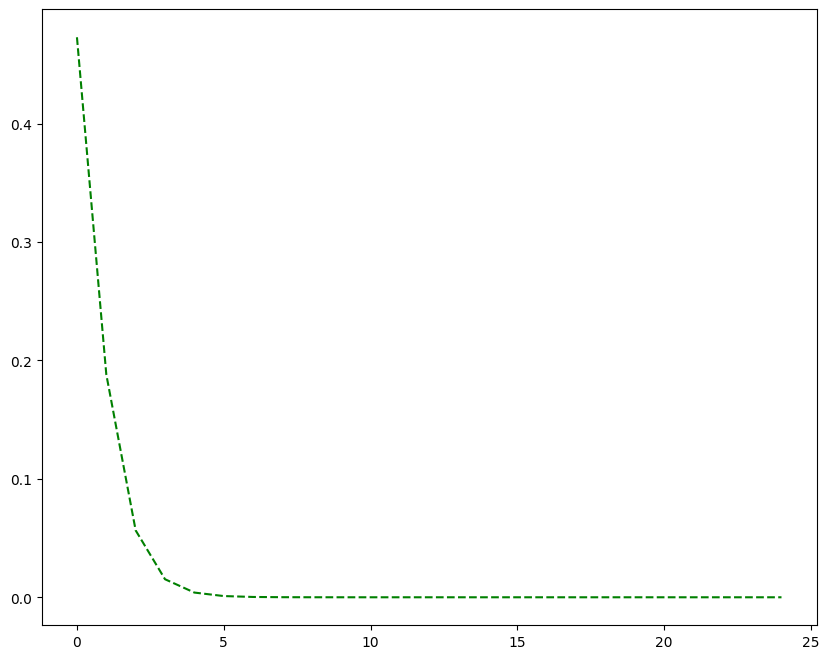

In [13]:
per_income = np.linspace(4000,900000 , 25)
loan_amnts = np.linspace(500,35000 , 25)
per_length = np.linspace(0,40, 25)
loan_rate = np.linspace(5,24 , 25)
loan_income = np.linspace(0,0.83, 25)
sigs = []
i=0
while i < 25:
    sigs.append(prediction_function(intercept[0],coefs[0][0] ,per_income[i],coefs[0][1],loan_amnts[i], coefs[0][2],per_length[i], coefs[0][3],loan_rate[i],coefs[0][4],loan_income[i]))
    i += 1
plt.plot( sigs, color='g', linestyle='--')

In [14]:
# save model
import pickle
with open('./models/model_Logistic_MultipleVariables_Nominal', 'wb') as f:
    pickle.dump(model, f)